In [1]:
import pandas as pd

In [7]:
#1 Load data and explore
df = pd.read_csv("adidas.csv")

In [12]:
# Display first 5 rows
print(df.head())

      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   01-01-2020  Northeast  New York  New York   
1  Foot Locker      1185732   02-01-2020  Northeast  New York  New York   
2  Foot Locker      1185732   03-01-2020  Northeast  New York  New York   
3  Foot Locker      1185732   04-01-2020  Northeast  New York  New York   
4  Foot Locker      1185732   05-01-2020  Northeast  New York  New York   

                     Product Price per Unit Units Sold Total Sales  \
0      Men's Street Footwear        $50.00       1,200  $6,00,000    
1    Men's Athletic Footwear        $50.00       1,000  $5,00,000    
2    Women's Street Footwear        $40.00       1,000  $4,00,000    
3  Women's Athletic Footwear        $45.00         850  $3,82,500    
4              Men's Apparel        $60.00         900  $5,40,000    

  Operating Profit Operating Margin Sales Method  
0       $3,00,000               50%     In-store  
1       $1,50,000         

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


In [9]:
# Summary statistics
print(df.describe())

        Retailer ID
count  9.648000e+03
mean   1.173850e+06
std    2.636038e+04
min    1.128299e+06
25%    1.185732e+06
50%    1.185732e+06
75%    1.185732e+06
max    1.197831e+06


In [ ]:
# Find the Top 5 States Where "Men's Athletic Footwear" Sells the Most

In [16]:
top_states = df[df["Product"] == "Men's Athletic Footwear"] \
             .groupby("State")["Units Sold"] \
             .sum() \
             .sort_values(ascending=False) \
             .head(5)

print(top_states)


State
Texas             8508759009259509509258508009009507756506757007...
Florida           7507507257758259009008508258008752504003504257...
California        7257006757508258759259258758759757006506506006...
South Carolina    7006757508009009008258007508757256252101821882...
Idaho             6256507257507757506255756757754253751691951961...
Name: Units Sold, dtype: object


In [ ]:
#How many unique products are sold?

In [17]:
unique_products = df["Product"].nunique()
print("Total Unique Products:", unique_products)


Total Unique Products: 6


In [ ]:
#Which region has the highest number of sales?

In [18]:
top_region = df.groupby("Region")["Total Sales"].sum().idxmax()
print("Region with Highest Sales:", top_region)


Region with Highest Sales: Midwest


In [ ]:
#What is the total revenue generated by online vs offline sales?

In [19]:
sales_method_revenue = df.groupby("Sales Method")["Total Sales"].sum()
print(sales_method_revenue)


Sales Method
In-store    $6,00,000 $5,00,000 $4,00,000 $3,82,500 $5,40,...
Online      $3,73,750 $4,95,000 $4,90,000 $5,95,000 $4,88,...
Outlet      $4,50,000 $3,80,000 $3,71,250 $5,40,000 $5,00,...
Name: Total Sales, dtype: object


In [ ]:
#Sales & Revenue Analysis: Find the top 5 most sold products.

In [20]:
top_products = df.groupby("Product")["Units Sold"].sum().sort_values(ascending=False).head(5)
print(top_products)


Product
Men's Apparel                9009008508258759009259009008758759005505005005...
Women's Athletic Footwear    8508258008258509009009259009009007006256006257...
Men's Street Footwear        1,2001,2501,2201,2001,2201,2501,2751,2501,2001...
Women's Street Footwear      1,00095095090090092595095092592095070067570072...
Men's Athletic Footwear      1,0009009259009251,0001,0251,0251,0009751,0009...
Name: Units Sold, dtype: object


In [ ]:
#Find the most profitable product category.

In [22]:
most_profitable = df.groupby("Product")["Operating Profit"].sum().idxmax()
print("Most Profitable Product:", most_profitable)


Most Profitable Product: Men's Street Footwear


In [26]:
#the total sales in each region using a simple bar chart.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace this with your actual df)
# df = pd.read_csv("your_file.csv")  # If loading from a file

# Ensure "Total Sales" is numeric
df["Total Sales"] = pd.to_numeric(df["Total Sales"], errors="coerce")

# Group by Region and sum Total Sales
region_sales = df.groupby("Region")["Total Sales"].sum().reset_index()

# Print to check
print(region_sales)


      Region  Total Sales
0    Midwest          0.0
1  Northeast          0.0
2      South          0.0
3  Southeast          0.0
4       West          0.0


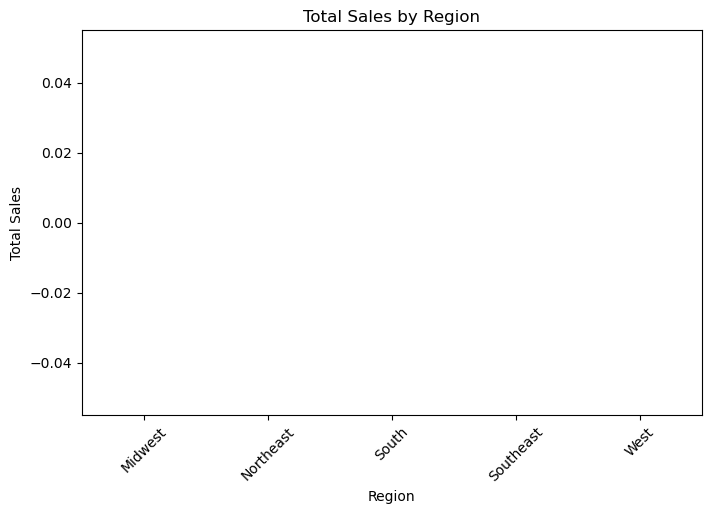

In [32]:
# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales["Region"], y=region_sales["Total Sales"], palette="viridis")

# Add labels
plt.xticks(rotation=45)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")

# Show plot
plt.show()
